In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import os
from lstm import (load_and_preprocess_nusax_sentiment, train_and_evaluate_lstm_variant,
                  LSTMFromScratch, ManualSGD, ManualSparseCategoricalCrossentropy,
                  calculate_f1_macro, build_lstm_model)

In [3]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), num_classes, vocab_size, text_vectorizer = load_and_preprocess_nusax_sentiment(max_features=10000, maxlen=200)

MAX_LEN = 200
EMBEDDING_DIM = 128

Loading NusaX sentiment data...
Labels encoded. Classes: ['negative' 'neutral' 'positive'] -> [0 1 2]
Vocabulary size: 2836 (max_features was 10000)
x_train shape: (500, 200), y_train shape: (500,)
x_val shape: (100, 200), y_val shape: (100,)
x_test shape: (400, 200), y_test shape: (400,)
Number of classes: 3


2025-05-30 13:50:38.072051: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
results = {}
best_f1 = -1
best_keras_lstm = None

analysis_epochs = 10


=== 1. Analisis Pengaruh Jumlah Layer LSTM ===
Epoch 1/10


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.3301 - loss: 1.0924 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3813 - loss: 1.0870 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3601 - loss: 1.0738 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4052 - loss: 1.0795 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3974 - loss: 1.0743 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3462 - loss: 1.0754 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3844 - loss: 1.0796 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4062 - loss: 1.0756 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 9/10

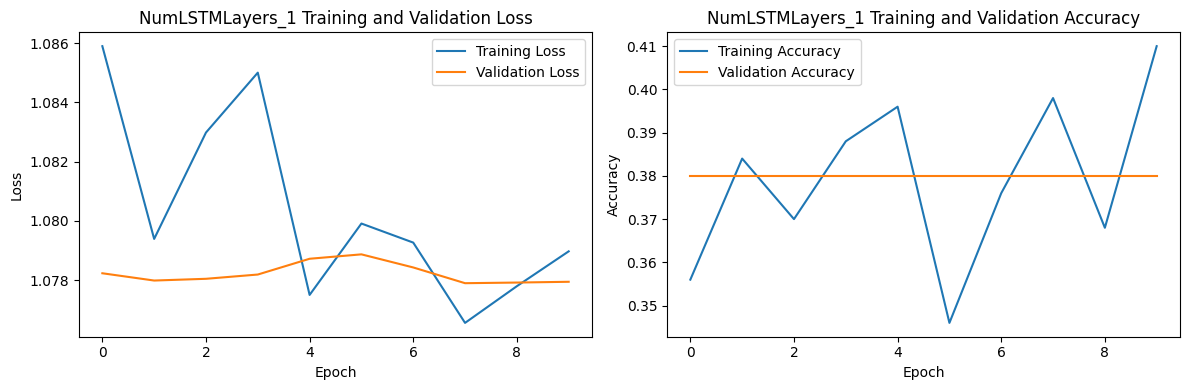

F1-Score for NumLSTMLayers_1: 0.1844
Epoch 1/10


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.3433 - loss: 1.0942 - val_accuracy: 0.3800 - val_loss: 1.0803
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4142 - loss: 1.0753 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3759 - loss: 1.0842 - val_accuracy: 0.3800 - val_loss: 1.0803
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.3221 - loss: 1.0913 - val_accuracy: 0.3800 - val_loss: 1.0791
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4143 - loss: 1.0744 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.3375 - loss: 1.0854 - val_accuracy: 0.3800 - val_loss: 1.0793
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3916 - loss: 1.0734 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.3657 - loss: 1.0826 - val_accuracy: 0.3800 - val_loss: 1.0781
Epo

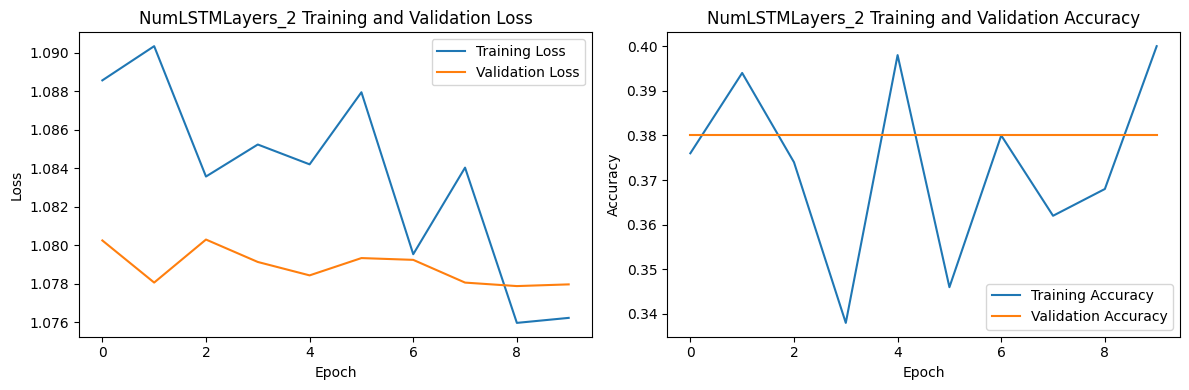

F1-Score for NumLSTMLayers_2: 0.1844
Epoch 1/10


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.3870 - loss: 1.0894 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.3859 - loss: 1.0730 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - accuracy: 0.3717 - loss: 1.0808 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.3693 - loss: 1.0836 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.3716 - loss: 1.0814 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.3524 - loss: 1.0856 - val_accuracy: 0.3800 - val_loss: 1.0803
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.3969 - loss: 1.0741 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.3283 - loss: 1.0942 - val_accuracy: 0.3800 - val_loss: 1.0790
Epo

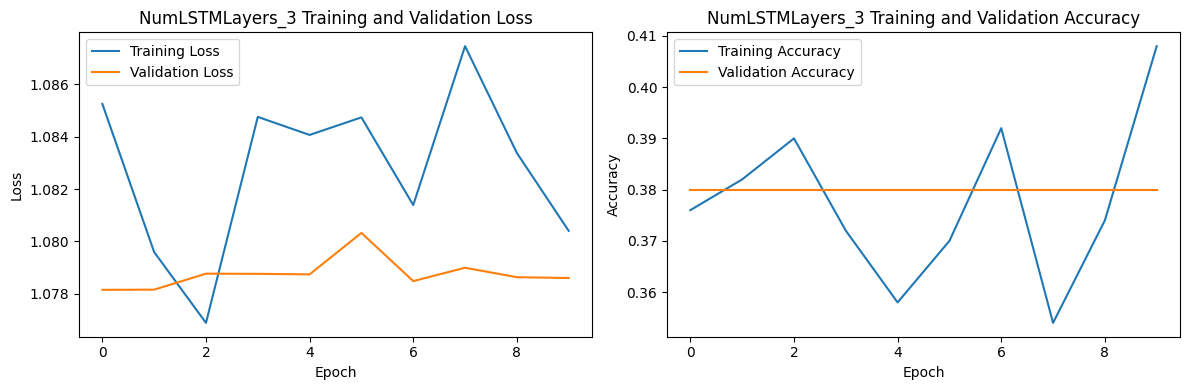

F1-Score for NumLSTMLayers_3: 0.1844


In [5]:
print("\n=== 1. Analisis Pengaruh Jumlah Layer LSTM ===")
num_lstm_layer_variations = [
    [{'units': 64, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': True}, {'units': 32, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': True}, {'units': 32, 'bidirectional': False, 'return_sequences': True}, {'units': 16, 'bidirectional': False, 'return_sequences': False}]
]
for i, config in enumerate(num_lstm_layer_variations):
    desc = f"NumLSTMLayers_{i+1}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_lstm_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        lstm_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_lstm = keras_model_variant
        best_keras_lstm.save("best_lstm_model.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    
    # Save plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'
    plt.plot(history.history[acc_key], label='Training Accuracy')
    plt.plot(history.history[val_acc_key], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")


=== 2. Analisis Pengaruh Banyak Unit LSTM ===
Epoch 1/10


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.3976 - loss: 1.0893 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3534 - loss: 1.0854 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3649 - loss: 1.0874 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3567 - loss: 1.0882 - val_accuracy: 0.3800 - val_loss: 1.0805
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3645 - loss: 1.0874 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4068 - loss: 1.0700 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3415 - loss: 1.0704 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3888 - loss: 1.0876 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 9/10


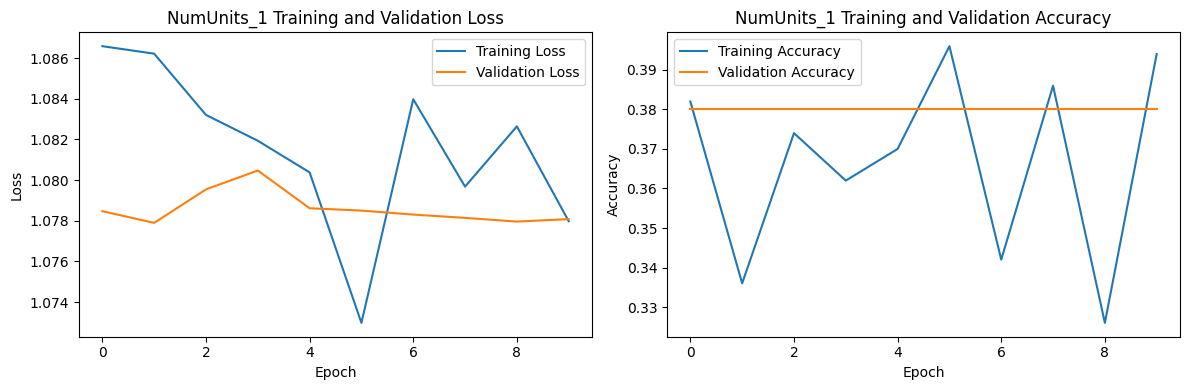

F1-Score for NumUnits_1: 0.1844
Epoch 1/10


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.3424 - loss: 1.0968 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4026 - loss: 1.0784 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3690 - loss: 1.0867 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3934 - loss: 1.0756 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3518 - loss: 1.0883 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3852 - loss: 1.0764 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3609 - loss: 1.0809 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3788 - loss: 1.0736 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 9/10


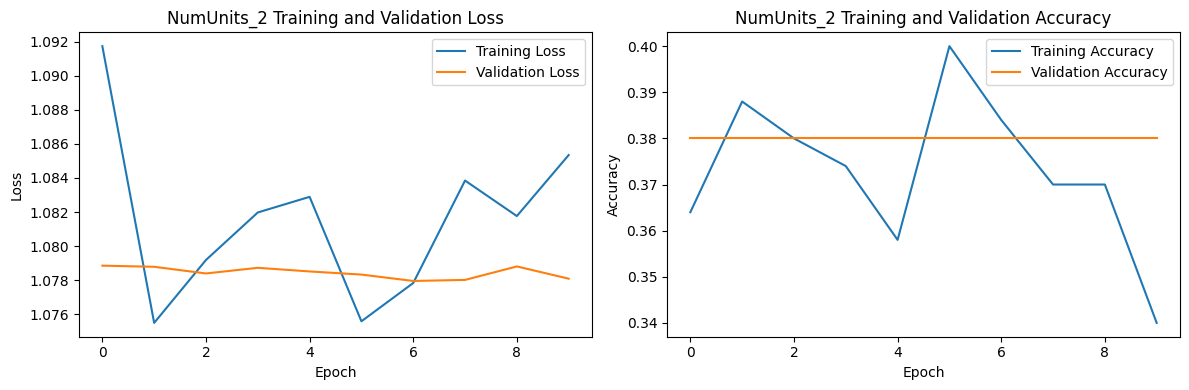

F1-Score for NumUnits_2: 0.1827
Epoch 1/10


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.4009 - loss: 1.0862 - val_accuracy: 0.3800 - val_loss: 1.0804
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4032 - loss: 1.0680 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.3804 - loss: 1.0728 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.4071 - loss: 1.0825 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.3918 - loss: 1.0929 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4540 - loss: 1.0667 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.3914 - loss: 1.0820 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.3885 - loss: 1.0818 - val_accuracy: 0.3800 - val_loss: 1.0782
Epo

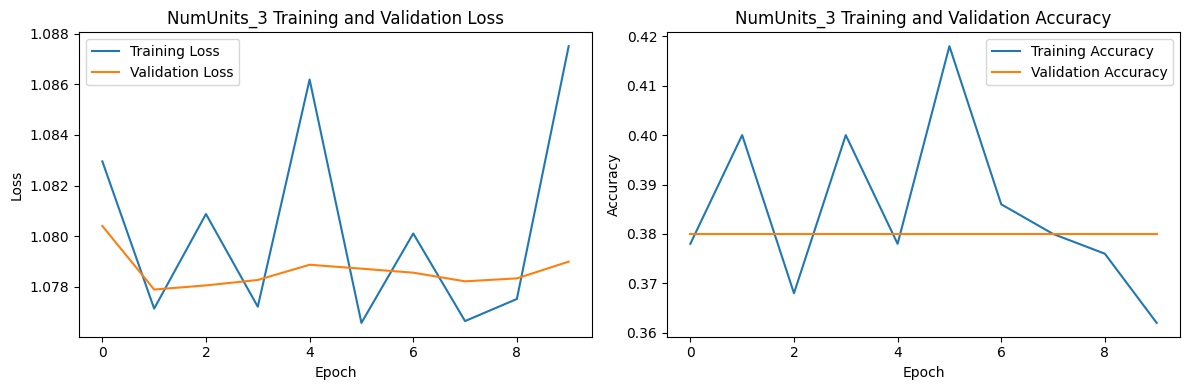

F1-Score for NumUnits_3: 0.1827


In [6]:
print("\n=== 2. Analisis Pengaruh Banyak Unit LSTM ===")
unit_variations = [
    [{'units': 32, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 64, 'bidirectional': False, 'return_sequences': False}],
    [{'units': 128, 'bidirectional': False, 'return_sequences': False}]
]
for i, config in enumerate(unit_variations):
    desc = f"NumUnits_{i+1}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_lstm_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        lstm_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_lstm = keras_model_variant
        best_keras_lstm.save("best_lstm_model.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    
    # Save plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'
    plt.plot(history.history[acc_key], label='Training Accuracy')
    plt.plot(history.history[val_acc_key], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")


=== 3. Analisis Pengaruh Jenis LSTM (Unidirectional vs. Bidirectional) ===
Epoch 1/10


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.3260 - loss: 1.0935 - val_accuracy: 0.3800 - val_loss: 1.0801
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3781 - loss: 1.0939 - val_accuracy: 0.3800 - val_loss: 1.0790
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3333 - loss: 1.0875 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3810 - loss: 1.0810 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3945 - loss: 1.0810 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3777 - loss: 1.0857 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3568 - loss: 1.0851 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3631 - loss: 1.0917 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 9/10


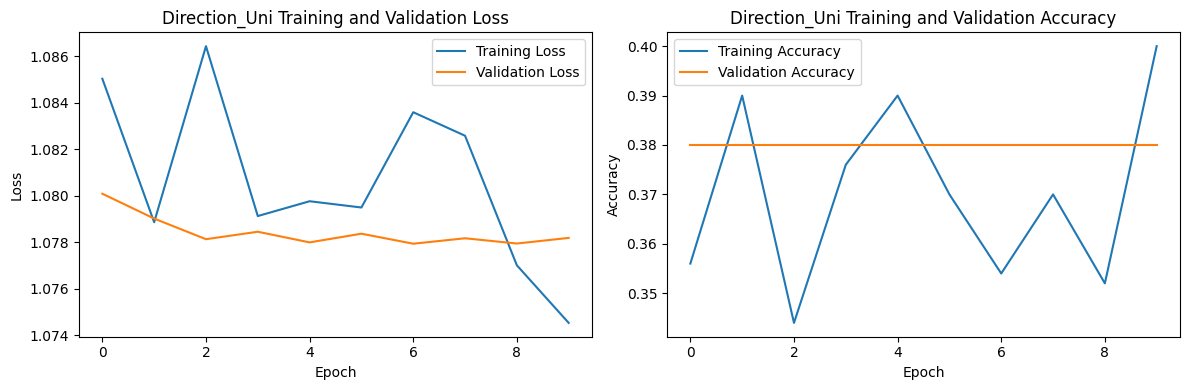

F1-Score for Direction_Uni: 0.1844


/home/qika/Code/Python Env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.4013 - loss: 1.0870 - val_accuracy: 0.5500 - val_loss: 1.0627
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5000 - loss: 1.0404 - val_accuracy: 0.4400 - val_loss: 1.0215
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5029 - loss: 0.9816 - val_accuracy: 0.5600 - val_loss: 0.9422
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6504 - loss: 0.8324 - val_accuracy: 0.6000 - val_loss: 0.8684
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6469 - loss: 0.7803 - val_accuracy: 0.6300 - val_loss: 0.8177
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.7557 - loss: 0.5923 - val_accuracy: 0.6600 - val_loss: 0.7334
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8637 - loss: 0.4253 - val_accuracy: 0.7200 - val_loss: 0.7316
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9184 - loss: 0.2999 - val_accuracy: 0.7100 - val_loss: 

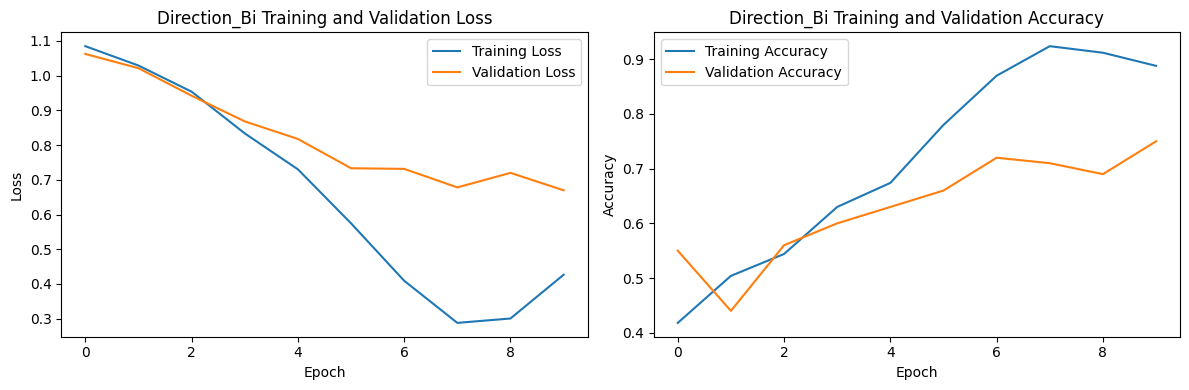

F1-Score for Direction_Bi: 0.7676


In [7]:
print("\n=== 3. Analisis Pengaruh Jenis LSTM (Unidirectional vs. Bidirectional) ===")
direction_variations = [False, True]
base_lstm_config = [{'units': 64, 'bidirectional': False, 'return_sequences': False}]
for is_bidirectional in direction_variations:
    config = base_lstm_config.copy()
    config[0] = config[0].copy()
    config[0]['bidirectional'] = is_bidirectional
    desc = f"Direction_{'Bi' if is_bidirectional else 'Uni'}"
    keras_model_variant, f1_score_keras, history = train_and_evaluate_lstm_variant(
        x_train, y_train, x_val, y_val, x_test, y_test,
        num_classes, vocab_size, EMBEDDING_DIM, MAX_LEN,
        lstm_config=config, epochs=analysis_epochs, batch_size=64, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_lstm = keras_model_variant
        best_keras_lstm.save("best_lstm_model.keras")
        print(f"New best model saved: {desc} with F1-Score {best_f1:.4f}")
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{desc} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    acc_key = 'accuracy' if 'accuracy' in history.history else 'sparse_categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_sparse_categorical_accuracy'
    plt.plot(history.history[acc_key], label='Training Accuracy')
    plt.plot(history.history[val_acc_key], label='Validation Accuracy')
    plt.title(f'{desc} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"F1-Score for {desc}: {f1_score_keras:.4f}")

In [8]:
print("\n--- Ringkasan F1 Scores LSTM Variants (Keras Model) ---")
for desc, f1_val in results.items():
    print(f"{desc}: {f1_val:.4f}")

if best_keras_lstm is not None:
    best_keras_lstm.save("best_lstm_model.keras")
    print("Best Keras LSTM model saved as best_lstm_model.keras")
    print("LSTM Experiment Summary\n")
    print("======================\n")
    print("\nNumber of Layers Analysis\n")
    for i in range(1, 4):
        desc = f"NumLSTMLayers_{i}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print("\nNumber of Units Analysis\n")
    for i in range(1, 4):
        desc = f"NumUnits_{i}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print("\nDirectionality Analysis\n")
    for dir in ['Uni', 'Bi']:
        desc = f"Direction_{dir}"
        if desc in results:
            print(f"{desc}: F1 = {results[desc]:.4f}\n")
    print(f"\nBest Model: F1-Score = {best_f1:.4f}\n")
else:
    print("No model was trained successfully.")


--- Ringkasan F1 Scores LSTM Variants (Keras Model) ---
NumLSTMLayers_1: 0.1844
NumLSTMLayers_2: 0.1844
NumLSTMLayers_3: 0.1844
NumUnits_1: 0.1844
NumUnits_2: 0.1827
NumUnits_3: 0.1827
Direction_Uni: 0.1844
Direction_Bi: 0.7676
Best Keras LSTM model saved as best_lstm_model.keras
LSTM Experiment Summary



Number of Layers Analysis

NumLSTMLayers_1: F1 = 0.1844

NumLSTMLayers_2: F1 = 0.1844

NumLSTMLayers_3: F1 = 0.1844


Number of Units Analysis

NumUnits_1: F1 = 0.1844

NumUnits_2: F1 = 0.1827

NumUnits_3: F1 = 0.1827


Directionality Analysis

Direction_Uni: F1 = 0.1844

Direction_Bi: F1 = 0.7676


Best Model: F1-Score = 0.7676



In [9]:
if best_keras_lstm is not None:
    lstm_manual = LSTMFromScratch()
    lstm_manual.load_keras_model(best_keras_lstm)
    print("Manual LSTM initialized with best Keras model weights.")
else:
    print("No best Keras model available to load into manual LSTM.")

Processing Keras layer: embedding_7 of type <class 'keras.src.layers.core.embedding.Embedding'>
Processing Keras layer: bidirectional of type <class 'keras.src.layers.rnn.bidirectional.Bidirectional'>
Processing Keras layer: dropout_7 of type <class 'keras.src.layers.regularization.dropout.Dropout'>
Ignoring Dropout layer: dropout_7 during manual inference/training.
Processing Keras layer: dense_7 of type <class 'keras.src.layers.core.dense.Dense'>
Manual LSTM initialized with best Keras model weights.



Predicting with Keras LSTM on 400 samples...
Predicting with Manual LSTM on 400 samples...
Keras LSTM output shape: (400, 3)
Manual LSTM output shape: (400, 3)

Macro F1-Score (Keras LSTM): 0.7676
Macro F1-Score (Manual LSTM): 0.7676
Absolute Difference: 0.000076


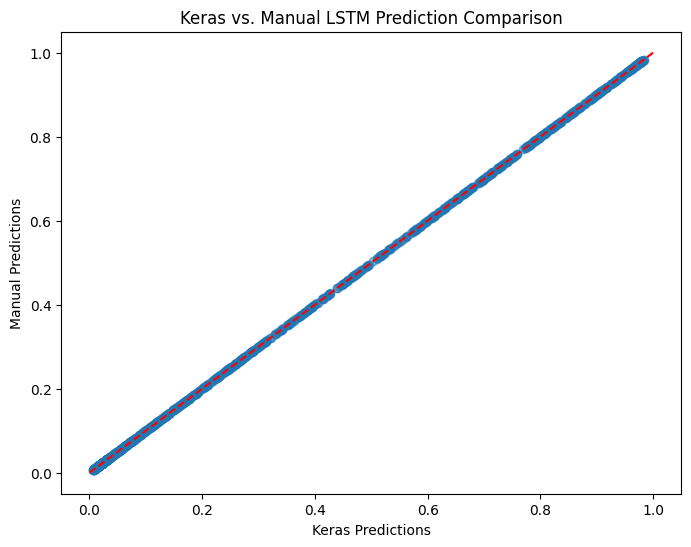

In [10]:
if best_keras_lstm is not None:
    x_test_sample = x_test
    y_test_sample = y_test
    
    print(f"\nPredicting with Keras LSTM on {x_test_sample.shape[0]} samples...")
    y_pred_keras_lstm_proba = best_keras_lstm.predict(x_test_sample, verbose=0)
    
    print(f"Predicting with Manual LSTM on {x_test_sample.shape[0]} samples...")
    y_pred_manual_lstm_proba = lstm_manual.predict(x_test_sample)
    
    print(f"Keras LSTM output shape: {y_pred_keras_lstm_proba.shape}")
    print(f"Manual LSTM output shape: {y_pred_manual_lstm_proba.shape}")
    
    f1_keras_lstm = calculate_f1_macro(y_test_sample, y_pred_keras_lstm_proba, num_classes)
    f1_manual_lstm = calculate_f1_macro(y_test_sample, y_pred_manual_lstm_proba, num_classes)
    
    abs_diff = np.sum(np.abs(y_pred_keras_lstm_proba - y_pred_manual_lstm_proba))
    print(f"\nMacro F1-Score (Keras LSTM): {f1_keras_lstm:.4f}")
    print(f"Macro F1-Score (Manual LSTM): {f1_manual_lstm:.4f}")
    print(f"Absolute Difference: {abs_diff:.6f}")
    assert abs_diff < 1e-3, 'Manual forward pass differs significantly from Keras!'
    
    # Save prediction comparison plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_keras_lstm_proba.flatten(), y_pred_manual_lstm_proba.flatten(), alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Keras Predictions')
    plt.ylabel('Manual Predictions')
    plt.title('Keras vs. Manual LSTM Prediction Comparison')
    plt.show()
else:
    print("Cannot perform prediction comparison due to missing best model.")